In [1]:
# munging imports
import pandas as pd
import numpy as np
import sys
import pickle

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score,f1_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, fbeta_score

In [3]:
df = pd.read_csv("BankChurners.csv", delimiter = ';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
#The dropped two columns are unuseful
df = df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [14]:
df['Attrition_Flag'].value_counts()/len(df.Attrition_Flag)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

##### The ratio above shows it's an imbalanced dataset

In [15]:
#Convert target var into dummies
df[['Attrited Customer','Existing Customer']] = pd.get_dummies(df['Attrition_Flag'])

In [16]:
df.drop(columns = "Existing Customer", inplace = True)

In [17]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited Customer
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


### Data Explodatory Analysis

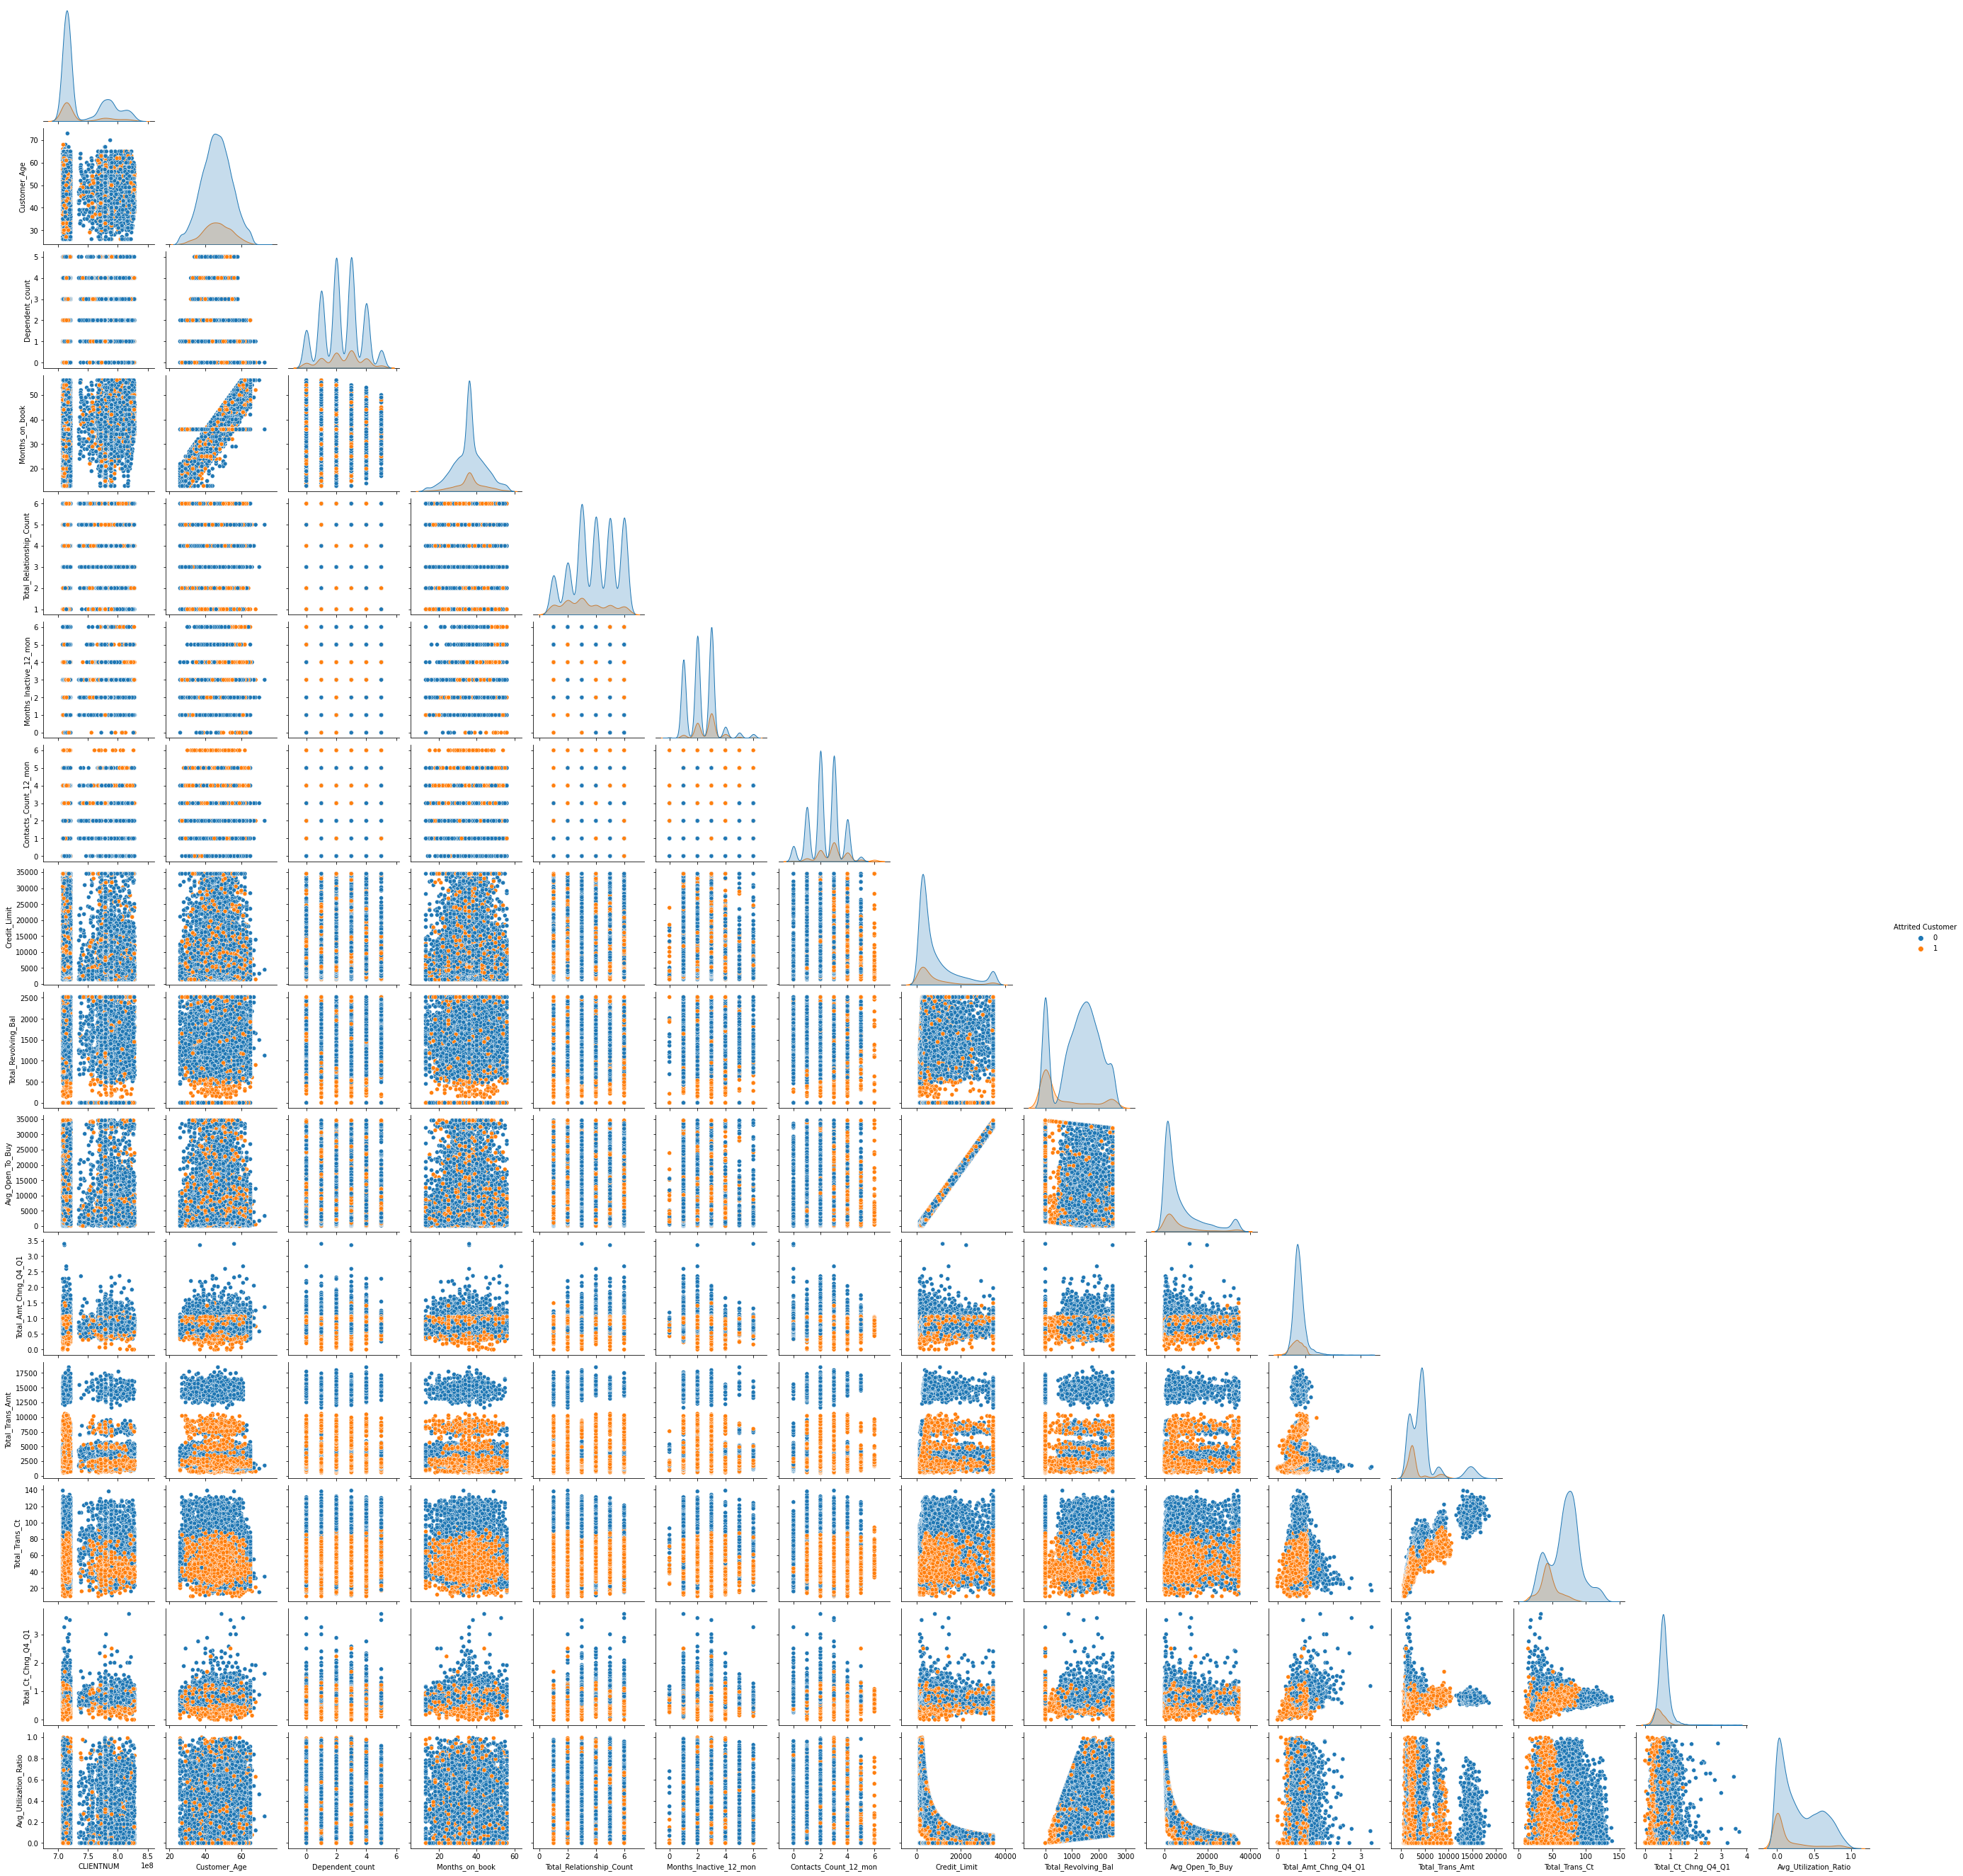

In [18]:
sns.pairplot(df, hue = 'Attrited Customer', corner = True);

In [19]:
gender_cnt = df.groupby(["Gender","Attrited Customer"])["CLIENTNUM"].count().reset_index()
gender_cnt

,Gender,Attrited Customer,CLIENTNUM
0,F,0,4428
1,F,1,930
2,M,0,4072
3,M,1,697


Text(0, 0.5, 'Counts')

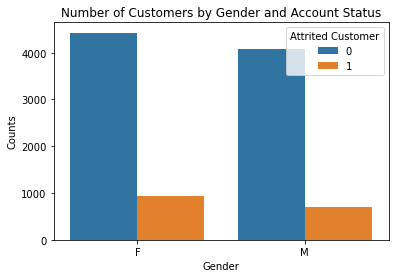

In [20]:
sns.barplot(x = 'Gender', y = 'CLIENTNUM', hue = 'Attrited Customer', data = gender_cnt)

plt.title("Number of Customers by Gender and Account Status")
plt.ylabel("Counts")

In [21]:
edu_cnt = df.groupby(["Education_Level","Attrited Customer"])["CLIENTNUM"].count().reset_index()
edu_cnt

,Education_Level,Attrited Customer,CLIENTNUM
0,College,0,859
1,College,1,154
2,Doctorate,0,356
3,Doctorate,1,95
4,Graduate,0,2641
5,Graduate,1,487
6,High School,0,1707
7,High School,1,306
8,Post-Graduate,0,424
9,Post-Graduate,1,92


Text(0, 0.5, 'Counts')

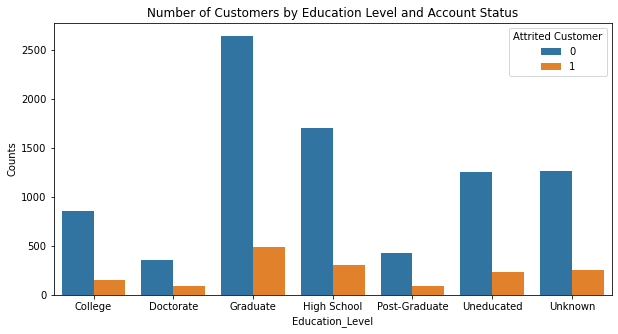

In [22]:
plt.figure(figsize = (10, 5))

sns.barplot(x = 'Education_Level', y = 'CLIENTNUM', hue = 'Attrited Customer', data = edu_cnt)

plt.title("Number of Customers by Education Level and Account Status")
plt.ylabel("Counts")

In [23]:
marital_cnt = df.groupby(["Marital_Status","Attrited Customer"])["CLIENTNUM"].count().reset_index()
marital_cnt

,Marital_Status,Attrited Customer,CLIENTNUM
0,Divorced,0,627
1,Divorced,1,121
2,Married,0,3978
3,Married,1,709
4,Single,0,3275
5,Single,1,668
6,Unknown,0,620
7,Unknown,1,129


Text(0, 0.5, 'Counts')

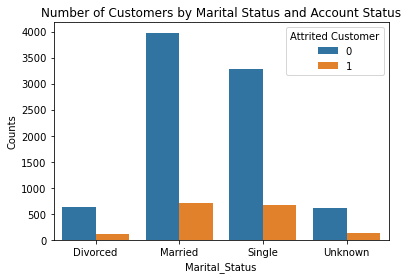

In [24]:
sns.barplot(x = 'Marital_Status', y = 'CLIENTNUM', hue = 'Attrited Customer', data = marital_cnt)

plt.title("Number of Customers by Marital Status and Account Status")
plt.ylabel("Counts")

In [25]:
income_cnt = df.groupby(["Income_Category","Attrited Customer"])["CLIENTNUM"].count().reset_index()
income_cnt


,Income_Category,Attrited Customer,CLIENTNUM
0,$120K +,0,601
1,$120K +,1,126
2,$40K - $60K,0,1519
3,$40K - $60K,1,271
4,$60K - $80K,0,1213
5,$60K - $80K,1,189
6,$80K - $120K,0,1293
7,$80K - $120K,1,242
8,Less than $40K,0,2949
9,Less than $40K,1,612


Text(0, 0.5, 'Counts')

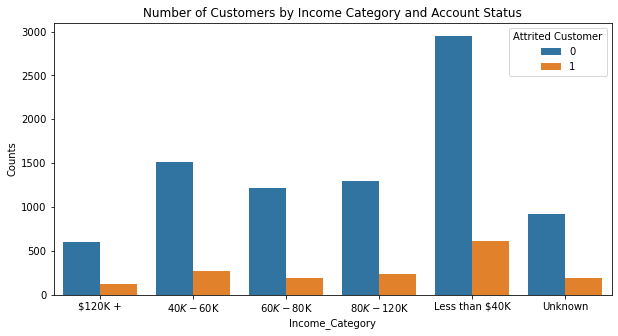

In [26]:
plt.figure(figsize = (10, 5))

sns.barplot(x = 'Income_Category', y = 'CLIENTNUM', hue = 'Attrited Customer', data = income_cnt)

plt.title("Number of Customers by Income Category and Account Status")
plt.ylabel("Counts")

In [27]:
card_cnt = df.groupby(["Card_Category","Attrited Customer"])["CLIENTNUM"].count().reset_index()
card_cnt


,Card_Category,Attrited Customer,CLIENTNUM
0,Blue,0,7917
1,Blue,1,1519
2,Gold,0,95
3,Gold,1,21
4,Platinum,0,15
5,Platinum,1,5
6,Silver,0,473
7,Silver,1,82


Text(0, 0.5, 'Counts')

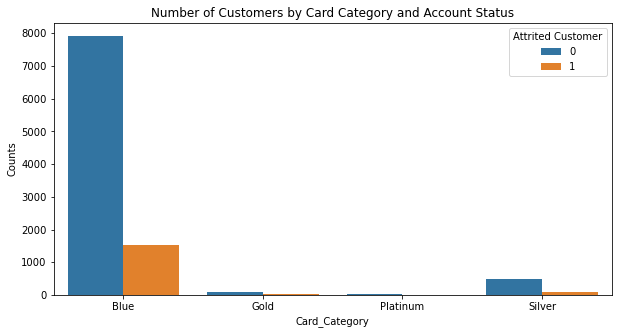

In [28]:
plt.figure(figsize = (10, 5))

sns.barplot(x = 'Card_Category', y = 'CLIENTNUM', hue = 'Attrited Customer', data = card_cnt)

plt.title("Number of Customers by Card Category and Account Status")
plt.ylabel("Counts")

In [29]:
df2 = df.copy()

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [31]:
#Create dummies
df2[['Female','Male']] = pd.get_dummies(df['Gender'])
df2[['College','Doctorate','Graduate','High School','Post-Graduate','Uneducated','Unknown_Edu']] = pd.get_dummies(df['Education_Level'])
df2[['Divorced','Married','Single','Unknown_Marital']] = pd.get_dummies(df['Marital_Status'])
df2[['$120K +','40K− 60K','60K− 80K','80K− 120K','Less than $40K','Unknown_income']] = pd.get_dummies(df['Income_Category'])
df2[['Blue','Gold','Platinum','Silver']] = pd.get_dummies(df['Card_Category'])


In [265]:
#Save to pickle
import sys
import pickle

with open('churned_data.pickle', 'wb') as to_write:
    pickle.dump(df2, to_write)


### Modeling

### Base Model
#### Train a Logistic Regression as the base model
#### Base model is built by features manually picked based on the pair plot

In [32]:
features_base = ['Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal', 'Avg_Open_To_Buy',
                 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
X_base = df2[features_base]
y = df2['Attrited Customer']

In [33]:
df2.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [34]:
# Apply stratify because the data is very imbalanced
X_base_train_test, X_base_validate, y_base_train_test, y_base_validate = train_test_split(X_base, y, test_size = 0.2, random_state=42)
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base_train_test, y_base_train_test, test_size = 0.2, random_state = 123)

In [35]:
lg_base = LogisticRegression()
lg_base.fit(X_base_train, y_base_train)

LogisticRegression()

In [36]:
lg_base.score(X_base_test, y_base_test)

0.8760024676125848

In [37]:
cm_base = confusion_matrix(y_base_test, lg_base.predict(X_base_test))

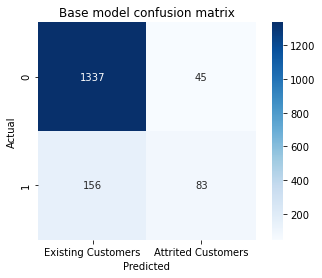

In [38]:
sns.heatmap(cm_base, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Existing Customers', 'Attrited Customers'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Base model confusion matrix');

In [39]:
print("Accuracy score is: ", lg_base.score(X_base_test, y_base_test))
print("precision score is: ", precision_score(y_base_test, lg_base.predict(X_base_test)))
print("recall score is: ", recall_score(y_base_test, lg_base.predict(X_base_test)))
print("F2 socre is: ", fbeta_score(y_base_test, lg_base.predict(X_base_test), beta = 2)) # Use F2 score to put higher weight on recall
print("AUC is: ", roc_auc_score(y_base_test, lg_base.predict_proba(X_base_test)[:,1]))

Accuracy score is:  0.8760024676125848
precision score is:  0.6484375
recall score is:  0.3472803347280335
F2 socre is:  0.38284132841328417
AUC is:  0.8605350320014049


### Cross Validation to test different feature engineerings

In [40]:
from sklearn.model_selection import KFold

In [41]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [42]:
df2['months_Inactive_12_mon_flag'] = np.where(df2.Months_Inactive_12_mon > 0,1,0)
df2['contacts_Count_12_mon_flag'] = np.where(df2.Contacts_Count_12_mon > 0,1,0)


In [43]:
X = df2.drop(columns = ['Attrited Customer'])
y = df2['Attrited Customer']

In [44]:
#make a validate dataset for final model evaluation
X_train_test, X_validate, y_train_test, y_validate = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

In [45]:
def cv_features(features, X_traintest = X_train_test, y_traintest = y_train_test, target = 'Attrited Customer', df = df2):
    lg_acc, lg_f2, lg_auc, lg_prec, lg_rec = [],[],[],[],[]
    
    X_ = X_traintest[features]
    y_ = y_traintest
    
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state=42, stratify = y_)
    
    kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
    
    X, y = np.array(X_train), np.array(y_train)
    
    for train_ind, test_ind in kf.split(X, y):
        X_train, y_train = X[train_ind], y[train_ind]
        X_test, y_test = X[test_ind], y[test_ind]
        
        scaler = StandardScaler()
        X_train_scaler = scaler.fit_transform(X_train)  #fit_transform only on training data
        X_test_scaler = scaler.transform(X_test) #transform the test data
        
        #Logistic Regression
        lg = LogisticRegression(solver='saga', C = 0.8, class_weight = 'balance')
        lg.fit(X_train_scaler, y_train)
        
        #Accuracy
        lg_acc.append(round(lg.score(X_test_scaler, y_test),2))
        #Precision
        lg_prec.append(round(precision_score(y_test, lg.predict(X_test_scaler)),2))
        #Recall
        lg_rec.append(round(recall_score(y_test, lg.predict(X_test_scaler)),2))
        #F1
        lg_f2.append(round(fbeta_score(y_test, lg.predict(X_test_scaler), beta = 2),2))
        #Auc
        lg_auc.append(round(roc_auc_score(y_test, lg.predict_proba(X_test_scaler)[:,1]),2))
     
        
    print(f'Accuracies: {lg_acc} and mean accuracy: {np.mean(lg_acc)}')
    print(f'Precisions: {lg_prec} and mean precision: {np.mean(lg_prec)}')
    print(f'Recalls: {lg_rec} and mean recall: {np.mean(lg_rec)}')
    print(f'F2 Scores: {lg_f2} and mean F2 score: {np.mean(lg_f2)}') 
    print(f'AUC Scores: {lg_auc} and mean AUC score: {np.mean(lg_auc)}')  

In [46]:
#Iteration1: include all feartures
cv_features(['Customer_Age','Female','Dependent_count', 'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 
            'Divorced', 'Married', 'Single', '$120K +', '40K− 60K', '60K− 80K', '80K− 120K', 'Less than $40K',
            'Blue', 'Gold','Platinum', 'Months_on_book', 'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',
            'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio'])

Accuracies: [0.9, 0.9, 0.91, 0.91, 0.91] and mean accuracy: 0.906
Precisions: [0.78, 0.74, 0.81, 0.78, 0.73] and mean precision: 0.768
Recalls: [0.58, 0.54, 0.63, 0.61, 0.59] and mean recall: 0.59
F2 Scores: [0.61, 0.57, 0.66, 0.64, 0.61] and mean F2 score: 0.618
AUC Scores: [0.93, 0.91, 0.92, 0.94, 0.92] and mean AUC score: 0.924


In [47]:
#Iteration2: remove credit_limit and open to buy, because they could be replaced by Avg_Utilization_Ratio¶
cv_features(['Customer_Age','Female','Dependent_count', 'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 
            'Divorced', 'Married', 'Single', '$120K +', '40K− 60K', '60K− 80K', '80K− 120K', 'Less than $40K',
            'Blue', 'Gold','Platinum', 'Months_on_book', 'Total_Relationship_Count',
            'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1','Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio'])

Accuracies: [0.9, 0.9, 0.92, 0.9, 0.91] and mean accuracy: 0.906
Precisions: [0.77, 0.74, 0.82, 0.77, 0.72] and mean precision: 0.764
Recalls: [0.58, 0.55, 0.63, 0.59, 0.58] and mean recall: 0.586
F2 Scores: [0.61, 0.58, 0.67, 0.62, 0.61] and mean F2 score: 0.618
AUC Scores: [0.93, 0.92, 0.92, 0.94, 0.92] and mean AUC score: 0.9259999999999999


In [48]:
#Iteration3: Add two new features
#### 1) inactive_12_month_flag
#### 2) contacts_12_month_flag

cv_features(['Customer_Age','Female','Dependent_count', 'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 
            'Divorced', 'Married', 'Single', '$120K +', '40K− 60K', '60K− 80K', '80K− 120K', 'Less than $40K',
            'Blue', 'Gold','Platinum', 'Months_on_book', 'Total_Relationship_Count',
            'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1','Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio',
            'months_Inactive_12_mon_flag', 'contacts_Count_12_mon_flag'])


Accuracies: [0.9, 0.9, 0.92, 0.9, 0.91] and mean accuracy: 0.906
Precisions: [0.77, 0.74, 0.83, 0.78, 0.73] and mean precision: 0.77
Recalls: [0.57, 0.56, 0.64, 0.59, 0.58] and mean recall: 0.588
F2 Scores: [0.6, 0.59, 0.67, 0.62, 0.6] and mean F2 score: 0.616
AUC Scores: [0.93, 0.92, 0.93, 0.93, 0.92] and mean AUC score: 0.9260000000000002


### Choose features in iteration 3
### Continue to train the model by testing hyperprameters

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Test different thresholds because the data is very imbalanced
# Corss validation: find best thresholds in each fold, then calculate the average

features = ['Customer_Age','Female','Dependent_count', 'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 
            'Divorced', 'Married', 'Single', '$120K +', '40K− 60K', '60K− 80K', '80K− 120K', 'Less than $40K',
            'Blue', 'Gold','Platinum', 'Months_on_book', 'Total_Relationship_Count',
            'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1','Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio',
            'months_Inactive_12_mon_flag', 'contacts_Count_12_mon_flag']

X = X_train_test[features]
y = y_train_test


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y_train_test)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)  #fit_transform only on training data
X_test_scaler = scaler.transform(X_test)

In [52]:
scoring = {'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f2_score' : make_scorer(fbeta_score, beta = 2)}

In [53]:
param_grid = {"C": [0.1, 0.5, 1, 10, 100], "penalty": ["l1","l2"]}
lg =  LogisticRegression(solver='saga', class_weight = 'balance')
grid = GridSearchCV(lg, param_grid, cv = 5, scoring = scoring, refit = 'f2_score')

In [54]:
grid.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balance',
                                          solver='saga'),
             param_grid={'C': [0.1, 0.5, 1, 10, 100], 'penalty': ['l1', 'l2']},
             refit='f2_score',
             scoring={'f2_score': make_scorer(fbeta_score, beta=2),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [55]:
df_cv = pd.DataFrame(grid.cv_results_)

In [56]:
print("Best Hyperparameter: ", grid.best_params_)
print("Best F2 score: ", grid.best_score_)

Best Hyperparameter:  {'C': 10, 'penalty': 'l1'}
Best F2 score:  0.6151405577116804


### Test different decision thresholds

In [57]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [58]:
X_, y_ = np.array(X), np.array(y)

Max F2 scores are 0.761904761904762
Max F2 scores are 0.7532826537664133
Max F2 scores are 0.7607142857142858
Max F2 scores are 0.7906295754026353
Max F2 scores are 0.7709113607990012


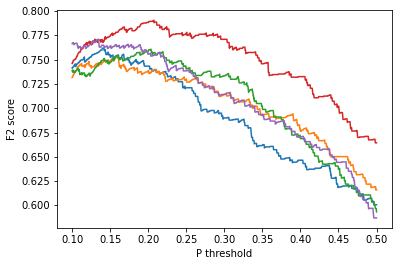

In [59]:
#Test different thresholds
for train_ind, test_ind in kf.split(X_, y_):
    X_train, y_train = X_[train_ind], y_[train_ind]
    X_test, y_test = X_[test_ind], y_[test_ind]
    
    scaler = StandardScaler()
    X_train_scaler = scaler.fit_transform(X_train)  #fit_transform only on training data
    X_test_scaler = scaler.transform(X_test) #transform the test data
    
    lg = LogisticRegression(solver='saga', C = 10, penalty='l1')
    lg.fit(X_train_scaler, y_train)
    lg_test_proba = lg.predict_proba(X_test_scaler)[:,1] #Positive class probas
    
    f2_scores = []
    thresh_ps = np.linspace(.10,.50,1000)
    
    for thresh in thresh_ps:
        lg_test_labels = lg_test_proba >= thresh
        f2_scores.append(fbeta_score(y_test, lg_test_labels, beta = 2))  
        
    plt.plot(thresh_ps, f2_scores)
    plt.xlabel('P threshold')
    plt.ylabel('F2 score')

    print(f'Max F2 scores are', max(f2_scores))
    

#### Logistic Reression could generate F2 score around 0.75 - 0.79

#### Fit the finalized Logistic Regression and check the confusion matrix

In [206]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)  #fit_transform only on training data
X_test_scaler = scaler.transform(X_test)

In [207]:
lg = LogisticRegression(solver='saga', C = 1, penalty = 'l1', class_weight = 'balanced')
lg.fit(X_train_scaler, y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', solver='saga')

In [208]:
lg_cm = confusion_matrix(y_test, lg.predict(X_test_scaler))

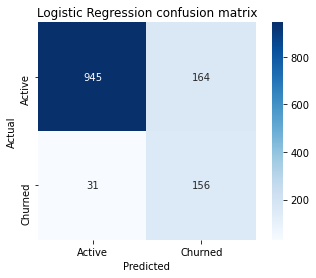

In [209]:
sns.heatmap(lg_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Active', 'Churned'],
           yticklabels=['Active', 'Churned'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression confusion matrix');

Text(0, 0.5, 'Recall score')

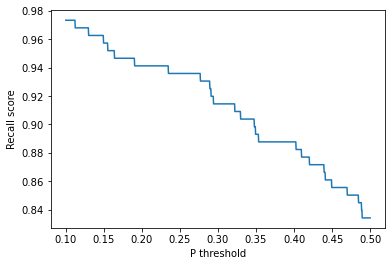

In [228]:
lg_test_proba = lg.predict_proba(X_test_scaler)[:,1]

recall_scores = []
thresh_ps = np.linspace(.10,.50,1000)

for thresh in thresh_ps:
    lg_test_labels = lg_test_proba >= thresh
    recall_scores.append(recall_score(y_test, lg_test_labels))   
        
plt.plot(thresh_ps, recall_scores)
plt.xlabel('P threshold')
plt.ylabel('Recall score')

    #print(f'Max F2 scores are', max(f2_scores))

In [229]:
#Use threshold >= 0.3
lg_test_labels = lg_test_proba >= thresh

In [230]:
lg_acc= accuracy_score(y_test, lg_test_labels)
lg_f2 = fbeta_score(y_test, lg_test_labels, beta = 2)
lg_auc = roc_auc_score(y_test, lg_test_proba)
lg_prec = precision_score(y_test, lg_test_labels)
lg_rec = recall_score(y_test, lg_test_labels)

In [232]:
print(f'F2 Scores: {lg_f2}') 
print(f'Precisions: {lg_prec}')
print(f'Recalls: {lg_rec}')
print(f'Accuracies: {lg_acc}')

F2 Scores: 0.7303370786516853
Precisions: 0.4875
Recalls: 0.8342245989304813
Accuracies: 0.8495370370370371


### Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CLIENTNUM                    10127 non-null  int64  
 1   Attrition_Flag               10127 non-null  object 
 2   Customer_Age                 10127 non-null  int64  
 3   Gender                       10127 non-null  object 
 4   Dependent_count              10127 non-null  int64  
 5   Education_Level              10127 non-null  object 
 6   Marital_Status               10127 non-null  object 
 7   Income_Category              10127 non-null  object 
 8   Card_Category                10127 non-null  object 
 9   Months_on_book               10127 non-null  int64  
 10  Total_Relationship_Count     10127 non-null  int64  
 11  Months_Inactive_12_mon       10127 non-null  int64  
 12  Contacts_Count_12_mon        10127 non-null  int64  
 13  Credit_Limit    

In [81]:
features_rf = ['Customer_Age','Female','Dependent_count', 'College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 
            'Divorced', 'Married', 'Single', '$120K +', '40K− 60K', '60K− 80K', '80K− 120K', 'Less than $40K',
            'Blue', 'Gold','Platinum', 'Months_on_book', 'Total_Relationship_Count',
            'Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
            'Total_Ct_Chng_Q4_Q1','Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Avg_Utilization_Ratio']

In [82]:
len(features_rf)

30

In [95]:
# Cross Validation: test class_weight = 'balanced'
rf_acc, rf_f2, rf_auc, rf_prec, rf_rec = [],[],[],[],[]
    
X_rf = X_train_test[features_rf]
y_rf = y_train_test
    
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.2, random_state=42, stratify = y_rf)
    
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
    
X_rf, y_rf = np.array(X_train_rf), np.array(y_train_rf)
    
for train_ind, test_ind in kf.split(X_rf, y_rf):
    X_train, y_train = X_rf[train_ind], y_rf[train_ind]
    X_test, y_test = X_rf[test_ind], y_rf[test_ind]
        
        
    #Random Forest
    rf = RandomForestClassifier(class_weight = 'balanced', max_features= 6)
    rf.fit(X_train, y_train)
        
    #Accuracy
    rf_acc.append(round(rf.score(X_test, y_test),2))
    #Precision
    rf_prec.append(round(precision_score(y_test, rf.predict(X_test)),2))
    #Recall
    rf_rec.append(round(recall_score(y_test, rf.predict(X_test)),2))
    #F1
    rf_f2.append(round(fbeta_score(y_test, rf.predict(X_test), beta = 2),2))
    #Auc
    rf_auc.append(round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),2))
        
        
print(f'Accuracies: {rf_acc} and mean accuracy: {np.mean(rf_acc)}')
print(f'Precisions: {rf_prec} and mean precision: {np.mean(rf_prec)}')
print(f'Recalls: {rf_rec} and mean recall: {np.mean(rf_rec)}')
print(f'F2 Scores: {rf_f2} and mean F2 score: {np.mean(rf_f2)}') 
print(f'AUC Scores: {rf_auc} and mean AUC score: {np.mean(rf_auc)}')  

Accuracies: [0.95, 0.95, 0.95, 0.95, 0.96] and mean accuracy: 0.952
Precisions: [0.95, 0.92, 0.94, 0.9, 0.94] and mean precision: 0.93
Recalls: [0.75, 0.74, 0.74, 0.75, 0.78] and mean recall: 0.752
F2 Scores: [0.78, 0.77, 0.77, 0.78, 0.81] and mean F2 score: 0.7820000000000001
AUC Scores: [0.99, 0.99, 0.99, 0.99, 0.99] and mean AUC score: 0.99


In [ ]:
#RF without weight class
Accuracies: [0.95, 0.95, 0.96, 0.96, 0.96] and mean accuracy: 0.9559999999999998
Precisions: [0.93, 0.91, 0.94, 0.92, 0.93] and mean precision: 0.9259999999999999
Recalls: [0.77, 0.77, 0.82, 0.8, 0.8] and mean recall: 0.792
F2 Scores: [0.8, 0.79, 0.84, 0.82, 0.82] and mean F2 score: 0.8140000000000001
AUC Scores: [0.98, 0.99, 0.99, 0.99, 0.99] and mean AUC score: 0.9880000000000001

In [ ]:
#RF with weight class
Accuracies: [0.95, 0.95, 0.95, 0.95, 0.96] and mean accuracy: 0.952
Precisions: [0.93, 0.94, 0.94, 0.91, 0.95] and mean precision: 0.9339999999999999
Recalls: [0.72, 0.75, 0.73, 0.77, 0.79] and mean recall: 0.752
F2 Scores: [0.76, 0.78, 0.76, 0.79, 0.82] and mean F2 score: 0.7819999999999999
AUC Scores: [0.98, 0.99, 0.99, 0.99, 0.99] and mean AUC score: 0.9880000000000001


''

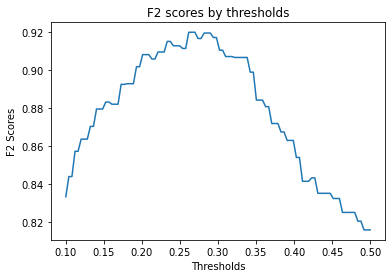

In [98]:
# test different threshold
rf_test_proba = rf.predict_proba(X_test)[:,1]

f2_scores = []
thresh_ps = np.linspace(.10,.50,100)

for thresh in thresh_ps:
    rf_test_labels = rf_test_proba >= thresh
    f2_scores.append(fbeta_score(y_test, rf_test_labels, beta = 2))
                   
plt.plot(thresh_ps, f2_scores)

plt.title("F2 scores by thresholds")
plt.xlabel("Thresholds")
plt.ylabel("F2 Scores")

;

In [194]:
# Cross Validate test threshold = 0.3

rf_acc, rf_f2, rf_auc, rf_prec, rf_rec = [],[],[],[],[]
    
X_rf = X_train_test[features_rf]
y_rf = y_train_test
    
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size = 0.2, random_state=42, stratify = y_rf)
    
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)
    
X_rf, y_rf = np.array(X_train_rf), np.array(y_train_rf)
    
for train_ind, test_ind in kf.split(X_rf, y_rf):
    X_train, y_train = X_rf[train_ind], y_rf[train_ind]
    X_test, y_test = X_rf[test_ind], y_rf[test_ind]
        
        
    #Random Forest
    rf = RandomForestClassifier(class_weight = 'balanced', max_features= 5)
    rf.fit(X_train, y_train)
    
    #lower the threshold
    rf_test_proba = rf.predict_proba(X_test)[:,1]
    rf_test_labels = rf_test_proba >= 0.3
    
    #Accuracy
    rf_acc.append(round(rf.score(X_test, rf_test_labels),2))
    #Precision
    rf_prec.append(round(precision_score(y_test, rf_test_labels),2))
    #Recall
    rf_rec.append(round(recall_score(y_test, rf_test_labels),2))
    #F1
    rf_f2.append(round(fbeta_score(y_test, rf_test_labels, beta = 2),2))
    #Auc
    rf_auc.append(round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),2))
        
        
print(f'Accuracies: {rf_acc} and mean accuracy: {np.mean(rf_acc)}')
print(f'Precisions: {rf_prec} and mean precision: {np.mean(rf_prec)}')
print(f'Recalls: {rf_rec} and mean recall: {np.mean(rf_rec)}')
print(f'F2 Scores: {rf_f2} and mean F2 score: {np.mean(rf_f2)}') 
print(f'AUC Scores: {rf_auc} and mean AUC score: {np.mean(rf_auc)}')  

Accuracies: [0.95, 0.95, 0.95, 0.95, 0.95] and mean accuracy: 0.95
Precisions: [0.85, 0.81, 0.85, 0.82, 0.82] and mean precision: 0.8300000000000001
Recalls: [0.92, 0.9, 0.9, 0.93, 0.91] and mean recall: 0.9120000000000001
F2 Scores: [0.9, 0.88, 0.89, 0.9, 0.89] and mean F2 score: 0.892
AUC Scores: [0.99, 0.99, 0.99, 0.98, 0.99] and mean AUC score: 0.9879999999999999


### XGBoost

In [100]:
import xgboost as xgb

In [195]:
X_train_test_gbm = X_train_test[features_rf]
y_train_test_gbm = y_train_test

In [196]:
X_train_gbm, X_test_gbm, y_train_gbm, y_test_gbm = train_test_split(X_train_test_gbm, y_train_test_gbm, test_size = 0.2, random_state=42, stratify = y_train_test_gbm)

In [197]:
gbm_acc, gbm_f2, gbm_auc, gbm_prec, gbm_rec = [],[],[],[],[]

kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

X_gbm, y_gbm = np.array(X_train_gbm), np.array(y_train_gbm)

for train_ind, test_ind in kf.split(X_gbm, y_gbm):
    X_train, y_train = X_gbm[train_ind], y_gbm[train_ind]
    X_test, y_test = X_gbm[test_ind], y_gbm[test_ind]

    gbm = xgb.XGBClassifier( 
                        n_estimators=1000,
                        max_depth=3,
                        objective='binary:logistic', 
                        learning_rate=.1, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8,
                        scale_pos_weight = 0.84
                       )

    eval_set=[(X_train,y_train),(X_test,y_test)]
    fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=20,
                    verbose=False
                   )

#lower the threshold
    gbm_test_proba = gbm.predict_proba(X_test, ntree_limit=gbm.best_ntree_limit)[:,1]
    gbm_test_labels = gbm_test_proba >= 0.3

    gbm_acc.append(round(accuracy_score(y_test, gbm_test_labels),2))
    gbm_f2.append(round(fbeta_score(y_test, gbm_test_labels, beta = 2),2))
    gbm_auc.append(round(roc_auc_score(y_test, gbm_test_proba),2))
    gbm_prec.append(round(precision_score(y_test, gbm_test_labels),2))
    gbm_rec.append(round(recall_score(y_test, gbm_test_labels),2))

/Users/wentingdeng/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wentingdeng/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wentingdeng/opt/anaconda3/lib/python3.8/site-packag

In [198]:
print(f'Accuracies: {gbm_acc} and mean accuracy: {np.mean(gbm_acc)}')
print(f'Precisions: {gbm_prec} and mean precision: {np.mean(gbm_prec)}')
print(f'Recalls: {gbm_rec} and mean recall: {np.mean(gbm_rec)}')
print(f'F2 Scores: {gbm_f2} and mean F2 score: {np.mean(gbm_f2)}') 
print(f'AUC Scores: {gbm_auc} and mean AUC score: {np.mean(gbm_auc)}')  

Accuracies: [0.96, 0.96, 0.97, 0.96, 0.97] and mean accuracy: 0.9639999999999999
Precisions: [0.86, 0.85, 0.89, 0.87, 0.89] and mean precision: 0.8720000000000001
Recalls: [0.89, 0.89, 0.9, 0.91, 0.94] and mean recall: 0.906
F2 Scores: [0.88, 0.88, 0.9, 0.9, 0.93] and mean F2 score: 0.898
AUC Scores: [0.99, 0.99, 0.99, 0.99, 0.99] and mean AUC score: 0.99


#### Because GBM generates slighly better F2 scores, I'll choose GBM as my final model

In [237]:
# Fit the model into Validation Data
X_val = X_validate[features_rf]
y_val = y_validate

In [284]:
gbm = xgb.XGBClassifier( 
                        n_estimators=1000,
                        max_depth=3,
                        objective='binary:logistic', 
                        learning_rate=.1, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8,
                        scale_pos_weight = 0.84
                       )

eval_set=[(X_train_gbm,y_train_gbm),(X_test_gbm,y_test_gbm)]
fit_model = gbm.fit( 
                    X_train_gbm, y_train_gbm, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=20,
                    verbose=False
                   )

In [285]:
#lower the threshold
gbm_val_acc, gbm_val_f2, gbm_val_auc, gbm_val_prec, gbm_val_rec = [],[],[],[],[]

gbm_val_proba = gbm.predict_proba(X_val, ntree_limit=gbm.best_ntree_limit)[:,1]
gbm_val_labels = gbm_val_proba >= 0.3

gbm_val_acc= accuracy_score(y_val, gbm_val_labels)
gbm_val_f2 = fbeta_score(y_val, gbm_val_labels, beta = 2)
gbm_val_auc = roc_auc_score(y_val, gbm_val_proba)
gbm_val_prec = precision_score(y_val, gbm_val_labels)
gbm_val_rec = recall_score(y_val, gbm_val_labels)

In [286]:
print(f'F2 Scores: {gbm_val_f2}') 
print(f'Precisions: {gbm_val_prec}')
print(f'Recalls: {gbm_val_rec}')
print(f'Accuracies: {gbm_val_acc}')

F2 Scores: 0.8888888888888888
Precisions: 0.9
Recalls: 0.8861538461538462
Accuracies: 0.9659427443237907


In [287]:
gbm_cm = confusion_matrix(y_val, gbm_val_labels)

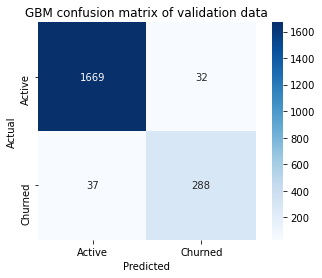

In [288]:
sns.heatmap(gbm_cm, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Active', 'Churned'],
           yticklabels=['Active', 'Churned'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GBM confusion matrix of validation data');

ROC AUC score =  0.9904110704110703


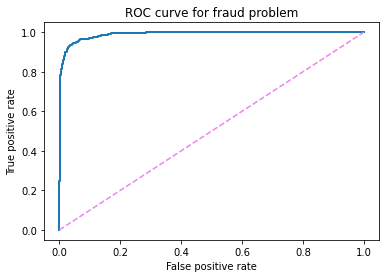

In [289]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, gbm_val_proba)


plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_val, gbm_val_proba))

In [290]:
#feature importance
gbm.get_booster().get_score(importance_type='gain')

{'Total_Trans_Ct': 33.80325918647259,
 'Total_Revolving_Bal': 32.55331293489361,
 'Total_Ct_Chng_Q4_Q1': 16.592200672935775,
 'Total_Relationship_Count': 23.424566625681162,
 'Total_Trans_Amt': 14.638731020274278,
 'Contacts_Count_12_mon': 7.137688669302325,
 'Total_Amt_Chng_Q4_Q1': 7.776778640579834,
 'Customer_Age': 6.560279874650602,
 'Months_Inactive_12_mon': 10.73333139834694,
 'Avg_Utilization_Ratio': 4.522475332607143,
 'Female': 10.075004764000003,
 'Months_on_book': 3.915403387030303,
 'Dependent_count': 1.925693608,
 'Married': 3.260068496333333,
 'Single': 1.1798008459999998,
 'Divorced': 3.942134615,
 '60K− 80K': 3.0118402250000003,
 '40K− 60K': 2.578401565,
 'Doctorate': 2.17163014,
 'College': 2.23338628,
 'Graduate': 2.118040445,
 'Less than $40K': 0.44507122,
 'Post-Graduate': 1.76524925,
 'Uneducated': 3.45648861}

In [291]:
#save model into a pickle
with open('gbm_model.pickle', 'wb') as to_write:
    pickle.dump(gbm, to_write)